<a href="https://colab.research.google.com/github/EsraaMosaad/NTI_training/blob/main/cifar10_dataset___.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np

In [ ]:

(x_train,y_train) , (x_test , y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
np.unique(y_train)
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train_final = x_train.reshape((-1,32*32*3)) 
x_train_final

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

In [ ]:
x_test_final = x_test.reshape((-1,32*32*3))

In [ ]:
model = Sequential()
model.add(Dense(10,input_shape=(32*32*3,), activation="softmax"))


In [ ]:
model.compile(optimizer='sgd',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
#results = model.fit(x=x_train, y=y_train,shuffle=True,epochs=10)
results=model.fit(
  x=x_train_final,
  y=y_train,
  shuffle=True,
  epochs=30,
  validation_data=(x_test_final,y_test)
)


Epoch 1/30
1563/1563 [==============================] - 8s 4ms/step - loss: 1.9455 - accuracy: 0.3047 - val_loss: 1.8880 - val_accuracy: 0.3341
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8442 - accuracy: 0.3515 - val_loss: 1.8517 - val_accuracy: 0.3558
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8123 - accuracy: 0.3654 - val_loss: 1.8848 - val_accuracy: 0.3367
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7967 - accuracy: 0.3726 - val_loss: 1.9033 - val_accuracy: 0.3321
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7848 - accuracy: 0.3770 - val_loss: 1.8259 - val_accuracy: 0.3584
Epoch 6/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7755 - accuracy: 0.3820 - val_loss: 1.8851 - val_accuracy: 0.3283
Epoch 7/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7659 - accuracy: 0.3833 - val_loss: 1.7828 - val_accuracy:

Text(0, 0.5, 'losses')

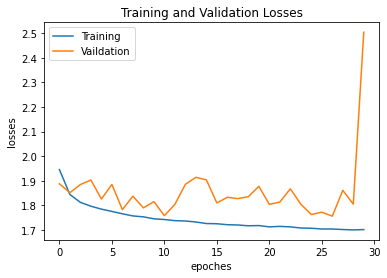

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

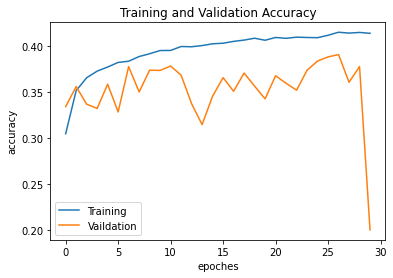

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')

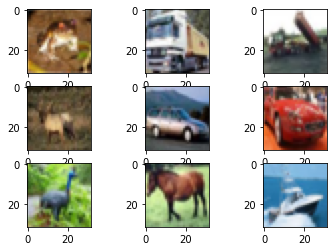

In [ ]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('Accent'))
pyplot.show()